# Module 6

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import imageio as img
import skimage as ski
import skimage.filters
import image_analysis as anl
import seaborn as sns; sns.set_style("white")

In [2]:
figfile = "Processed/"

## Exercise 6.1 - 6.5

Finding local maxima by dilating the image.

In [3]:
pic = img.imread("Images/emitters1_33px_bright_easy.png").astype('double')

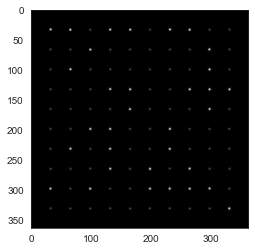

In [4]:
plt.imshow(pic, cmap = 'gray');

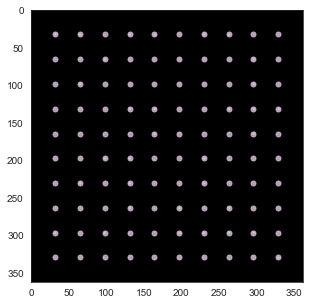

In [5]:
plt.figure(figsize = (5,5))
locs_r,locs_c,vals = anl.local_maxima(pic,plot=True)
plt.savefig(figfile+"local_maxima_quant_grid.png", dpi = 300)

We can find the local maxima of the image and then precisely localize the point sources as in the previous exercise.

In [6]:
pic2 = ski.transform.rescale(img.imread("Images/leopard_fur_gray.jpg"),0.5)
#plt.imshow(pic2,cmap = 'gray');

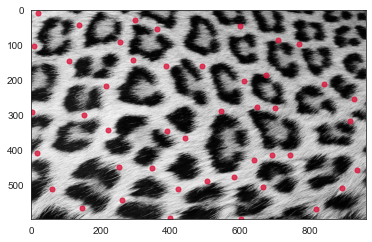

In [7]:
locs_r,locs_c,vals = anl.local_maxima(pic2,color = 'crimson',plot=True)
plt.savefig(figfile+"local_maxima_leopard.png", dpi = 300)

## Exercise 6.2 

Opening images.

In [8]:
N = 5
opened = ski.morphology.opening(pic2, ski.morphology.disk(N))

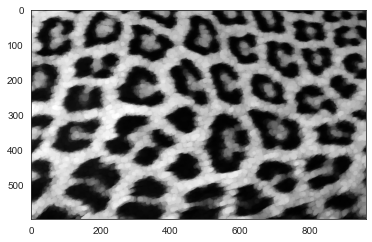

In [9]:
plt.imshow(opened,cmap = 'gray')
plt.savefig(figfile+"opened_(1)_leopard.png", dpi = 300)

In [10]:
N = 5
opened2 = ski.morphology.closing(ski.util.invert(pic2), ski.morphology.disk(N))

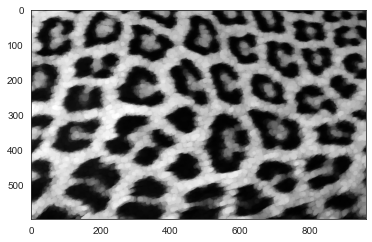

In [11]:
plt.imshow(ski.util.invert(opened2),cmap = 'gray')
plt.savefig(figfile+"opened_(2)_leopard.png", dpi = 300)

Morphological Reconstruction

In [12]:
seed = pic2.astype('double')-0.5
mask = pic2.astype('double')

In [13]:
reconstructed = ski.morphology.reconstruction(seed,mask,method = 'dilation',selem = ski.morphology.square(5))

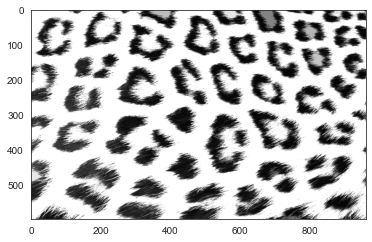

In [14]:
plt.imshow(reconstructed, cmap = 'gray');

We are left with just the dark patches and their details. The local maximas have been cut off. By subtracting this from the original, we can get just the local maximas.

## Exercise 6.3

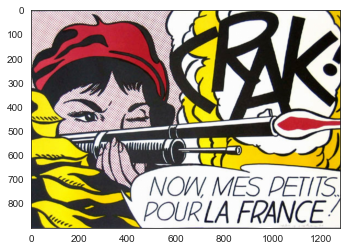

In [15]:
pic3 = img.imread("Images/roy-lichtenstein-pop-prints-crak.jpg")
plt.imshow(pic3,cmap = 'gray');

Morphological processing on the entire RGB image.

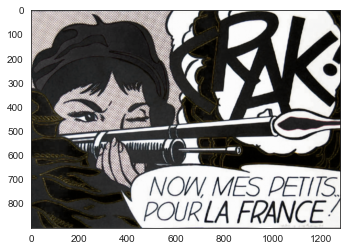

In [16]:
opened3 = ski.morphology.opening(pic3,ski.morphology.ball(2))
plt.imshow(opened3)
plt.savefig(figfile+"opened_image_sphere_se.png", dpi = 300)

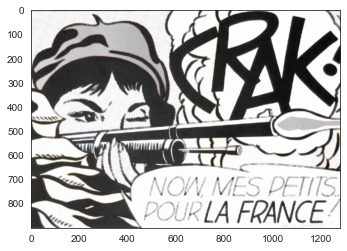

In [17]:
closed3 = ski.morphology.closing(pic3,ski.morphology.ball(3))
plt.imshow(closed3)
plt.savefig(figfile+"closed_image_sphere_se.png",dpi = 300)

Morphological processing on seperate layers.

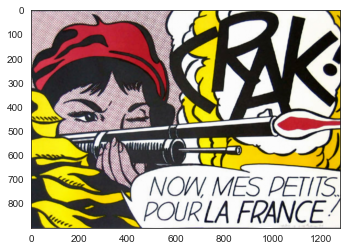

In [18]:
opened4 = ski.morphology.opening(pic3,np.array([ski.morphology.disk(2)]).T)
plt.imshow(opened4)
plt.savefig(figfile+"opened_image_disk_se.png", dpi = 300)

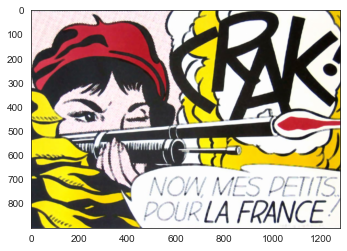

In [19]:
closed4 = ski.morphology.closing(pic3,np.array([ski.morphology.disk(3)]).T)
plt.imshow(closed4)
plt.savefig(figfile+"closed_image_disk_se.png",dpi = 300)

Morphological processing on grayscale image.

In [20]:
pic4 = ski.color.rgb2gray(img.imread("Images/roy-lichtenstein-pop-prints-crak.jpg"))
#plt.imshow(pic3,cmap = 'gray');

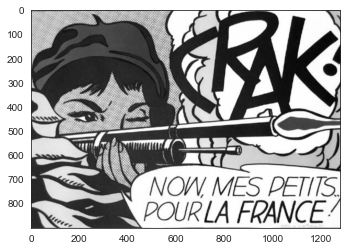

In [21]:
opened5 = ski.morphology.opening(pic4,ski.morphology.disk(2))
plt.imshow(opened5, cmap = 'gray')
plt.savefig(figfile+"opened_image_gray_disk_se.png", dpi = 300)

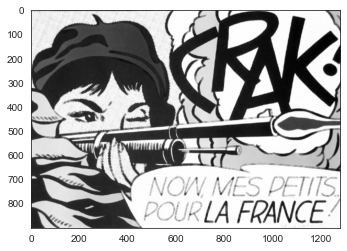

In [22]:
closed5 = ski.morphology.closing(pic4,ski.morphology.disk(3))
plt.imshow(closed5,cmap = 'gray')
plt.savefig(figfile+"closed_image_gray_disk_se.png", dpi = 300)

## Exercise 6.4

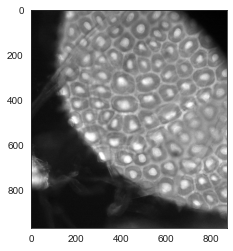

In [23]:
pic_root = img.imread("Images/Arabidosis_2a_20X_gfp_tubulin_crop.png").astype('double')
plt.imshow(pic_root, cmap = 'gray');

Dilation.

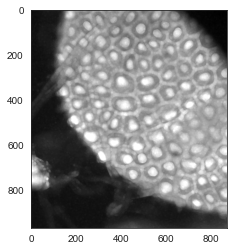

In [24]:
dilated = ski.morphology.dilation(pic_root, ski.morphology.disk(4))
plt.imshow(dilated, cmap = 'gray');

Thresholding.

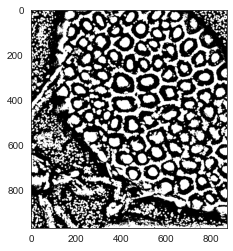

In [25]:
threshold = ski.filters.threshold_local(dilated, 75)
threshed_root = anl.thresher(dilated,threshold)
plt.imshow(threshed_root, cmap = 'gray');

Opening.

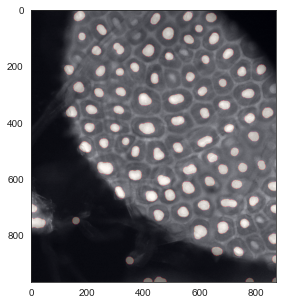

In [26]:
plt.figure(figsize = (5,5))
opened = ski.morphology.opening(threshed_root, ski.morphology.disk(13))
plt.imshow(pic_root, cmap = 'gray');
plt.imshow(opened, alpha = 0.3);
plt.savefig(figfile+"nuclei_located.png", dpi = 300)